In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score)

In [2]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
display(df.describe())

Dataset Shape: (958524, 45)

First few rows:


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 


,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [3]:
# Check for missing values
print("Missing Values per Column:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Check target variable distribution
print("\nTarget Variable Distribution (pha):")
print(df['pha'].value_counts())

Missing Values per Column:
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
ma                     1
ad                     4
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
rms                    2
dtype: int64

Target Variable Distribution (pha):
pha
N    936537
Y      2066
Name: count, dtype: int64


In [4]:
# Remove irrelevant columns (identifiers, names, descriptive text)
columns_to_drop = ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'epoch_cal', 'tp_cal', 'neo', 'orbit_id']

df_clean = df.drop(columns=columns_to_drop, errors='ignore')

print(f"Original columns: {df.shape[1]}")
print(f"Remaining columns: {df_clean.shape[1]}")

# Convert target variable to binary (Y/N to 1/0)
df_clean['pha'] = df_clean['pha'].map({'Y': 1, 'N': 0})

# Handle missing values - fill with median for numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Remove any remaining rows with missing values
df_clean = df_clean.dropna()

print(f"\nFinal cleaned dataset shape: {df_clean.shape}")
print(f"Target distribution after cleaning:\n{df_clean['pha'].value_counts()}")

Original columns: 45
Remaining columns: 35

Final cleaned dataset shape: (958524, 35)
Target distribution after cleaning:
pha
0.0    956458
1.0      2066
Name: count, dtype: int64


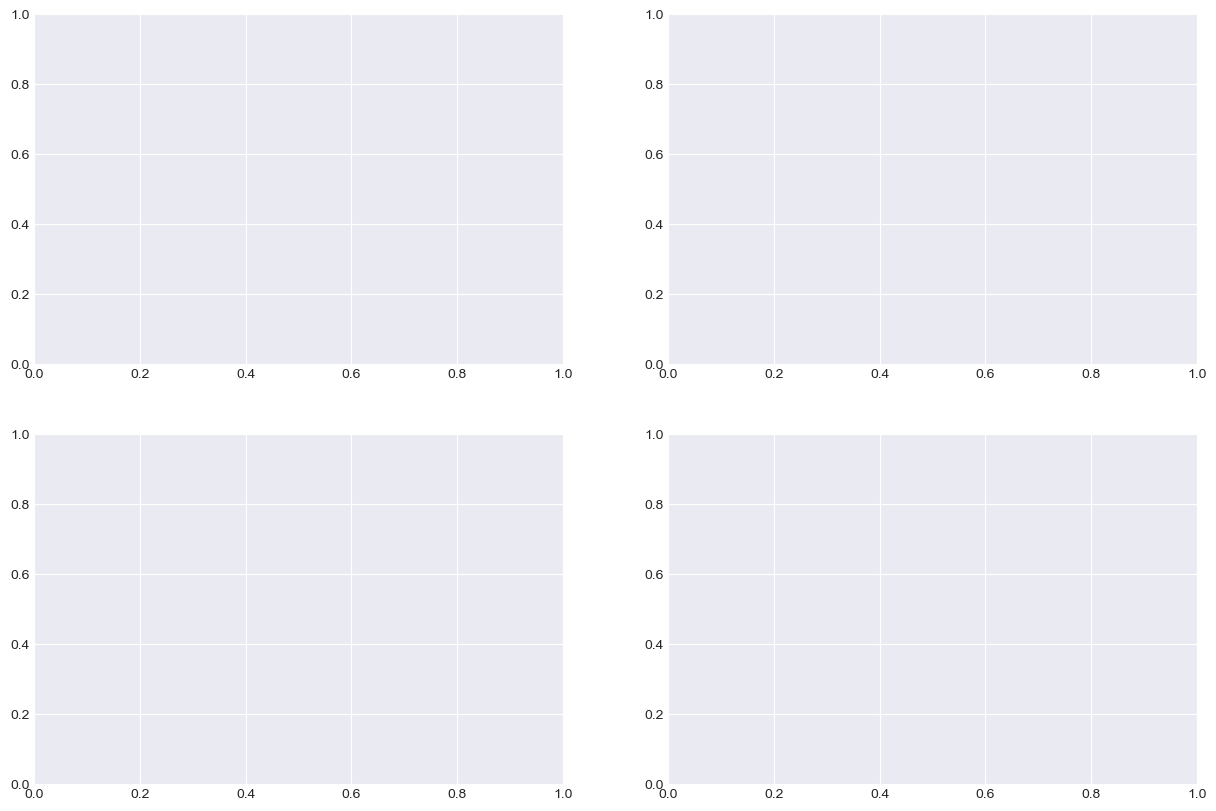

In [5]:
# Set up the plotting style
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [6]:
# 1. Target variable distribution
ax1 = axes[0, 0]
pha_counts = df_clean['pha'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.bar(['Non-Hazardous', 'Hazardous'], pha_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Distribution of Asteroid Classification', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(pha_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

In [7]:
# 2. Distribution of asteroid diameter
ax2 = axes[0, 1]
ax2.hist(df_clean['diameter'], bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Diameter (km)', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Distribution of Asteroid Diameter', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

In [8]:
# 3. Eccentricity vs Hazardous status
ax3 = axes[1, 0]
df_clean.boxplot(column='e', by='pha', ax=ax3, patch_artist=True)
ax3.set_xlabel('PHA Status (0=Non-Hazardous, 1=Hazardous)', fontsize=12)
ax3.set_ylabel('Orbital Eccentricity', fontsize=12)
ax3.set_title('Orbital Eccentricity by Hazard Status', fontsize=14, fontweight='bold')
plt.sca(ax3)
plt.xticks([1, 2], ['Non-Hazardous', 'Hazardous'])

([<matplotlib.axis.XTick at 0x2b2c924f250>,
 [Text(1, 0, 'Non-Hazardous'), Text(2, 0, 'Hazardous')])

In [9]:
# 4. Minimum Orbit Intersection Distance (MOID)
ax4 = axes[1, 1]
df_clean.boxplot(column='moid', by='pha', ax=ax4, patch_artist=True)
ax4.set_xlabel('PHA Status (0=Non-Hazardous, 1=Hazardous)', fontsize=12)
ax4.set_ylabel('MOID (AU)', fontsize=12)
ax4.set_title('Minimum Orbit Intersection Distance by Hazard Status', fontsize=14, fontweight='bold')
plt.sca(ax4)
plt.xticks([1, 2], ['Non-Hazardous', 'Hazardous'])

([<matplotlib.axis.XTick at 0x2b2c9282350>,
 [Text(1, 0, 'Non-Hazardous'), Text(2, 0, 'Hazardous')])

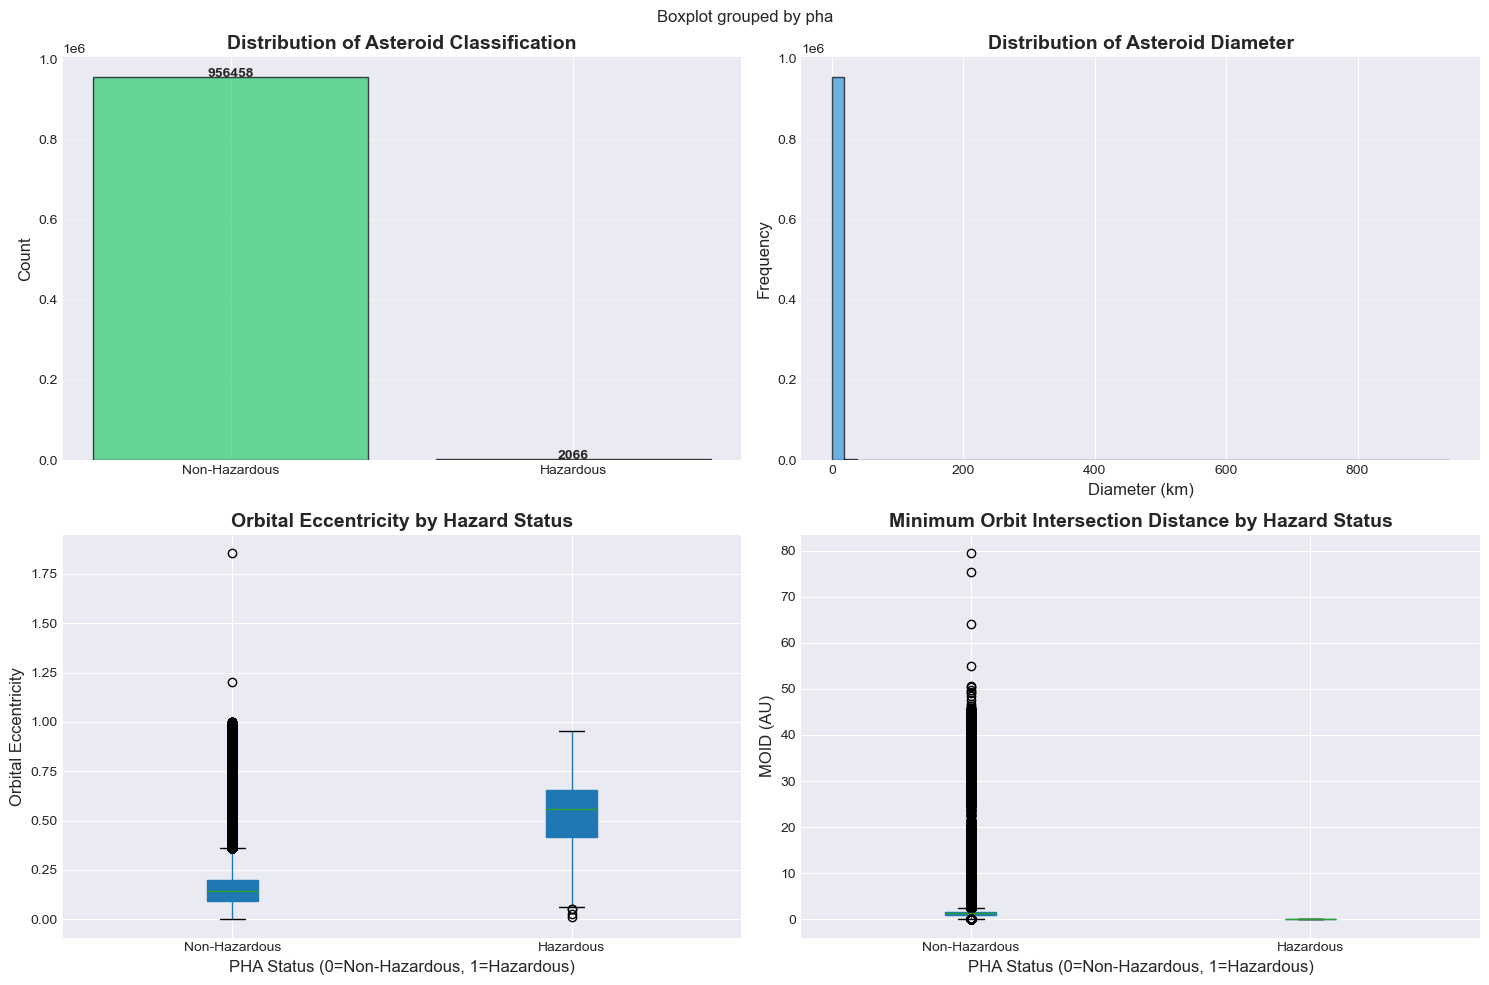

In [10]:
plt.tight_layout()
plt.show()

In [11]:
# Create derived features
df_features = df_clean.copy()

# 1. Orbital energy (related to semi-major axis)
df_features['orbital_energy'] = -1 / (2 * df_features['a'])

# 2. Perihelion to aphelion ratio
df_features['perihelion_aphelion_ratio'] = df_features['q'] / df_features['ad']

# 3. Orbital velocity at perihelion (simplified)
df_features['velocity_perihelion'] = np.sqrt((1 + df_features['e']) / df_features['q'])

# 4. Size category based on diameter
df_features['size_category'] = pd.cut(df_features['diameter'], bins=[0, 50, 200, 1000], labels=[0, 1, 2])

# 5. Composite uncertainty score (average of sigma values)
sigma_cols = [col for col in df_features.columns if col.startswith('sigma_')]
df_features['uncertainty_score'] = df_features[sigma_cols].mean(axis=1)

# 6. MOID in lunar distances per day (interaction feature)
df_features['moid_ld_per_day'] = df_features['moid_ld'] / df_features['per']

print("Engineered Features Created Successfully!")
print(f"Total features now: {df_features.shape[1]}")

Engineered Features Created Successfully!
Total features now: 41


In [12]:
# Prepare feature matrix and target
X = df_features.drop(['pha', 'class'], axis=1, errors='ignore')
y = df_features['pha']

# Remove any non-numeric columns
X = X.select_dtypes(include=[np.number])

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (958524, 37)
Target vector shape: (958524,)


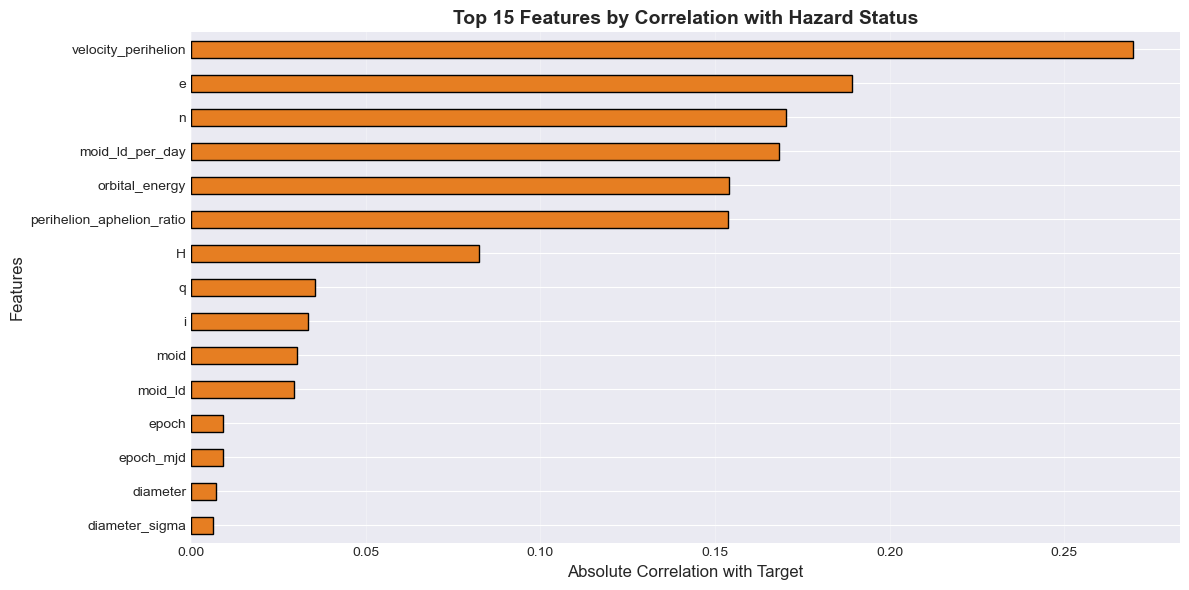

In [13]:
# Calculate correlation with target
correlations = X.corrwith(y).abs().sort_values(ascending=False)

# Plot top 15 correlations
plt.figure(figsize=(12, 6))
correlations.head(15).plot(kind='barh', color='#e67e22', edgecolor='black')
plt.xlabel('Absolute Correlation with Target', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Features by Correlation with Hazard Status', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
print("Top 10 Correlated Features:")
print(correlations.head(10))

Top 10 Correlated Features:
velocity_perihelion          0.269616
e                            0.189248
n                            0.170289
moid_ld_per_day              0.168432
orbital_energy               0.154138
perihelion_aphelion_ratio    0.153649
H                            0.082403
q                            0.035519
i                            0.033348
moid                         0.030222
dtype: float64


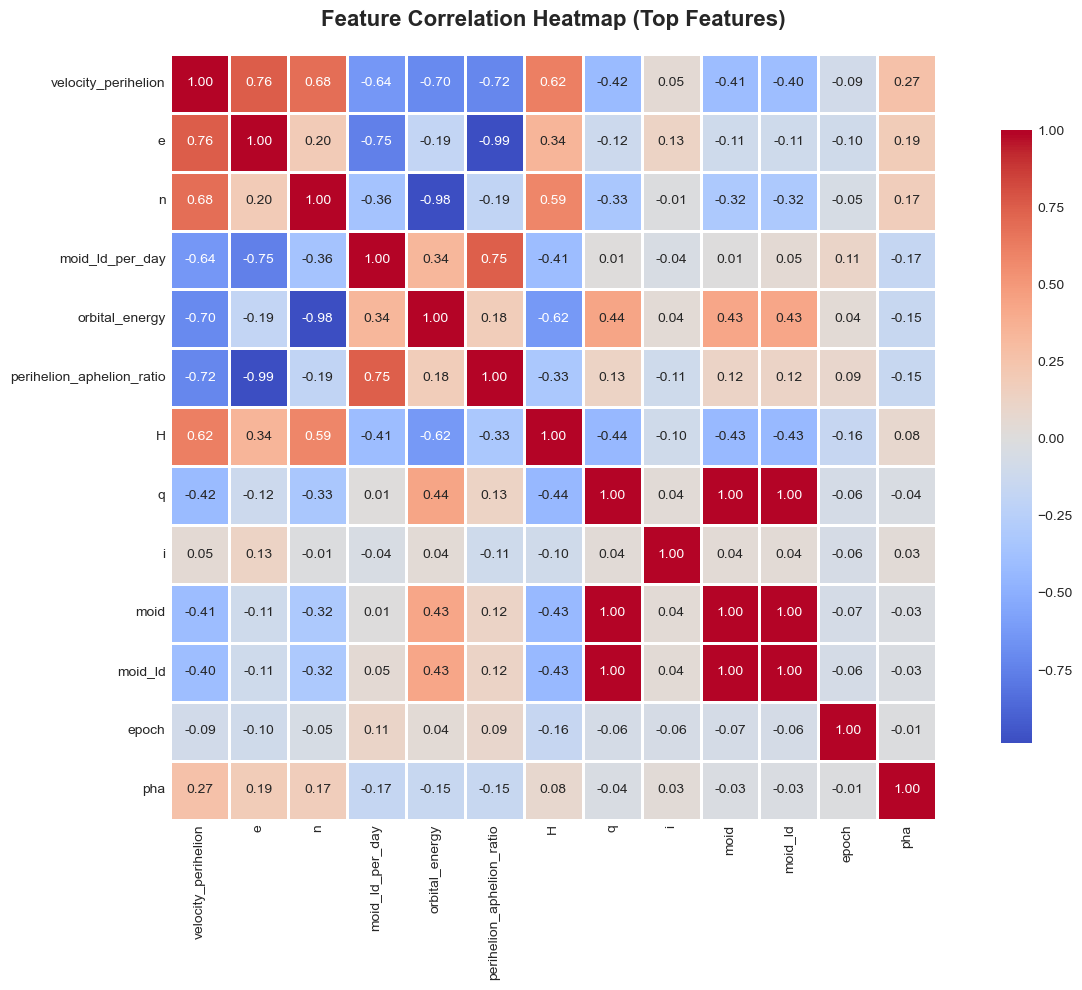

In [15]:
# Select top correlated features for heatmap
top_features = correlations.head(12).index.tolist()
correlation_matrix = df_features[top_features + ['pha']].corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap (Top Features)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [16]:
# Use SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=15)
X_kbest = selector.fit_transform(X, y)

# Get selected feature names
selected_features_kbest = X.columns[selector.get_support()].tolist()

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("SelectKBest - Top 15 Features:")
print(feature_scores.head(15))

SelectKBest - Top 15 Features:
                      Feature         Score
34        velocity_perihelion  75140.037703
6                           e  35604.511541
14                          n  28625.540934
36            moid_ld_per_day  27986.596653
32             orbital_energy  23327.236334
33  perihelion_aphelion_ratio  23176.055673
0                           H   6553.119597
8                           q   1210.830025
9                           i   1067.159741
18                       moid    876.257558
19                    moid_ld    836.835465
4                       epoch     82.220052
5                   epoch_mjd     82.212359
1                    diameter     47.803155
3              diameter_sigma     37.538916


<Figure size 1200x600 with 0 Axes>

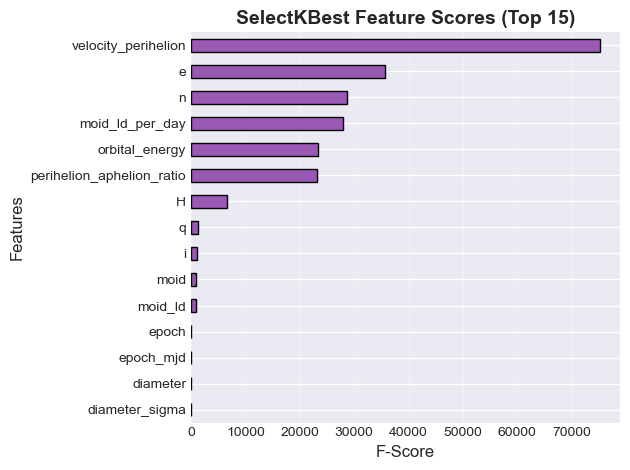

In [17]:
# Visualize feature scores
plt.figure(figsize=(12, 6))
feature_scores.head(15).plot(x='Feature', y='Score', kind='barh', color='#9b59b6', edgecolor='black', legend=False)
plt.xlabel('F-Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('SelectKBest Feature Scores (Top 15)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
# Train a Random Forest to get feature importances
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_temp.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_temp.feature_importances_
}).sort_values('Importance', ascending=False)

print("Random Forest - Top 15 Important Features:")
print(feature_importance.head(15))

Random Forest - Top 15 Important Features:
                      Feature  Importance
0                           H    0.236773
18                       moid    0.154915
19                    moid_ld    0.100860
36            moid_ld_per_day    0.055829
27                   sigma_ad    0.038591
26                   sigma_ma    0.033401
34        velocity_perihelion    0.031650
20                    sigma_e    0.031417
8                           q    0.029700
28                    sigma_n    0.029609
33  perihelion_aphelion_ratio    0.027170
30                  sigma_per    0.026054
23                    sigma_i    0.025736
22                    sigma_q    0.023071
35          uncertainty_score    0.020105


<Figure size 1200x600 with 0 Axes>

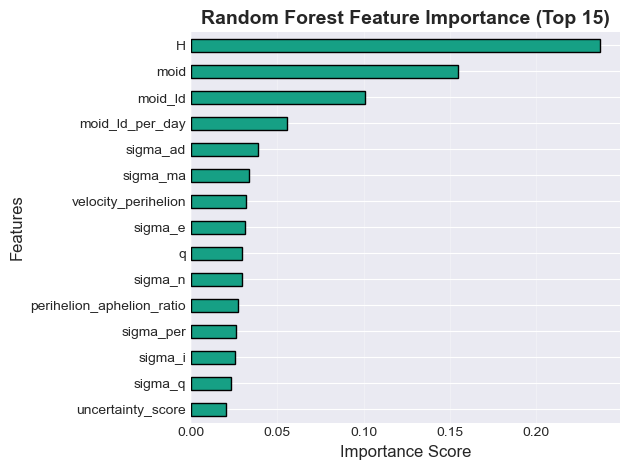

In [19]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
feature_importance.head(15).plot(x='Feature', y='Importance', kind='barh', color='#16a085', edgecolor='black', legend=False)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Random Forest Feature Importance (Top 15)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
# Select top features from each method
top_corr = correlations.head(10).index.tolist()
top_kbest = selected_features_kbest[:10]
top_rf = feature_importance.head(10)['Feature'].tolist()

# Find common features
from collections import Counter
all_selected = top_corr + top_kbest + top_rf
feature_counts = Counter(all_selected)

# Select features that appear in at least 2 methods
final_features = [feat for feat, count in feature_counts.items() if count >= 2]

In [21]:
# Ensure we have at least 10 features
if len(final_features) < 10:
    remaining = [feat for feat in top_corr if feat not in final_features]
    final_features.extend(remaining[:10 - len(final_features)])

print(f"Final Selected Features ({len(final_features)} features):")
for i, feat in enumerate(final_features, 1):
    print(f"{i}. {feat}")

# Create final feature matrix
X_selected = X[final_features]

Final Selected Features (10 features):
1. velocity_perihelion
2. e
3. n
4. moid_ld_per_day
5. H
6. q
7. i
8. moid
9. orbital_energy
10. perihelion_aphelion_ratio


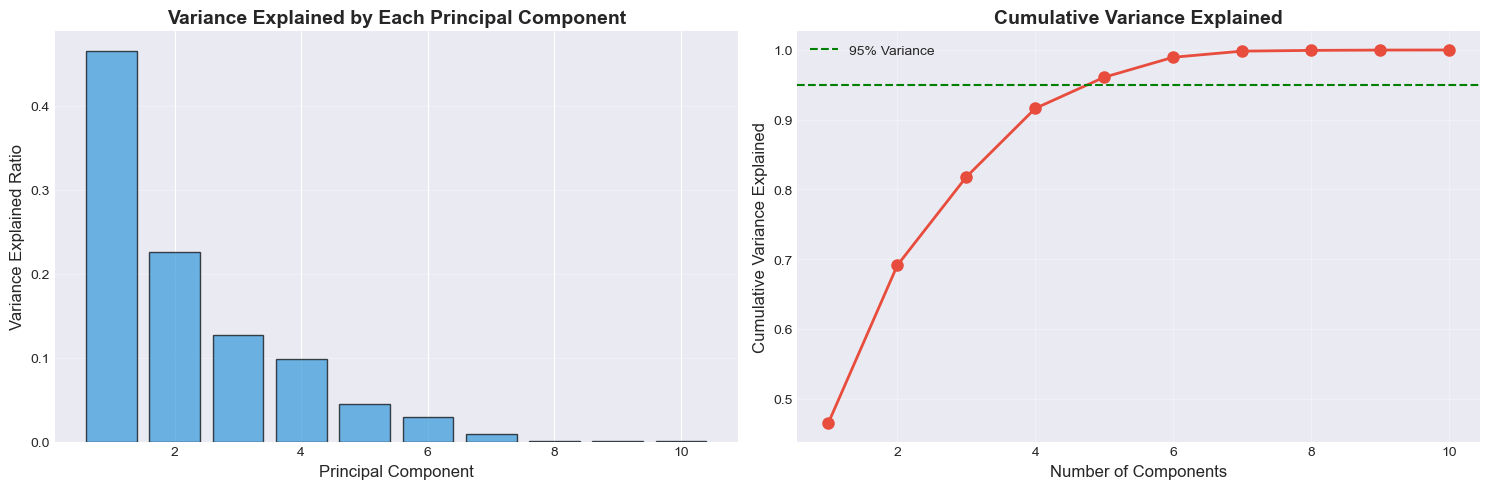


Number of components for 95% variance: 5
Variance explained by first 5 components: 0.9609


In [22]:
# Standardize features before PCA
scaler_pca = StandardScaler()
X_scaled_pca = scaler_pca.fit_transform(X_selected)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled_pca)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the figure and axes DIFFERENTLY
fig = plt.figure(figsize=(15, 5))

# First subplot - Variance explained by each component
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(range(1, len(pca.explained_variance_ratio_) + 1), 
        pca.explained_variance_ratio_, color='#3498db', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Variance Explained Ratio', fontsize=12)
ax1.set_title('Variance Explained by Each Principal Component', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Second subplot - Cumulative variance explained
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linestyle='-', color='#e74c3c', linewidth=2, markersize=8)
ax2.axhline(y=0.95, color='green', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Variance Explained', fontsize=12)
ax2.set_title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Determine optimal number of components
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components for 95% variance: {n_components_95}")
print(f"Variance explained by first {n_components_95} components: {cumulative_variance[n_components_95-1]:.4f}")

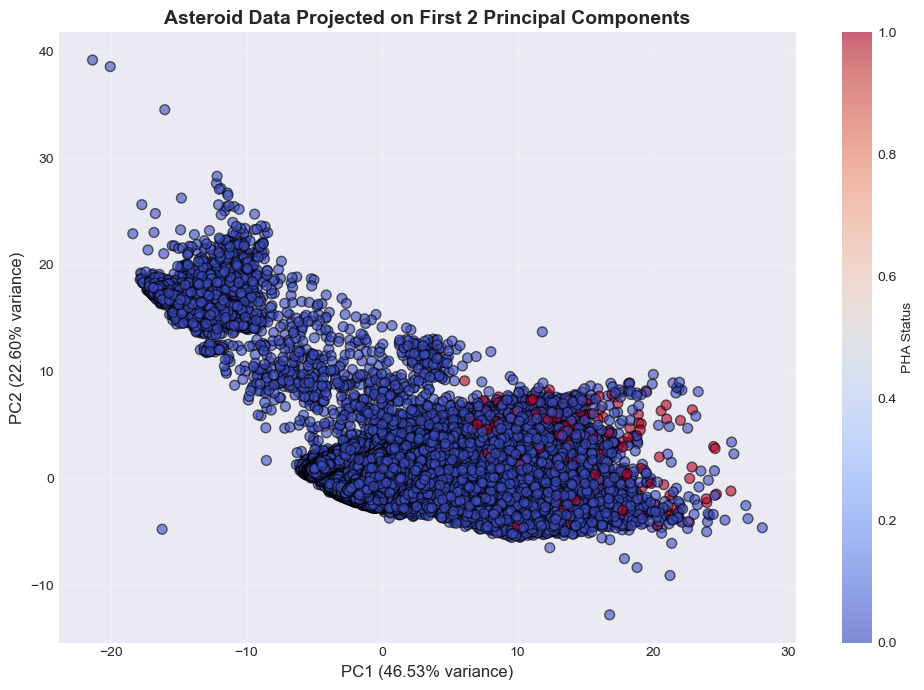

In [23]:
# Visualize data in first 2 principal components
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolors='black', s=50)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Asteroid Data Projected on First 2 Principal Components', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='PHA Status')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
# **Critical Issue**: Our dataset is severely imbalanced (~99.8% non-hazardous). 
# We need special techniques to ensure models learn to identify hazardous asteroids accurately.

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Check class imbalance ratio
class_counts = y.value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"Non-Hazardous: {class_counts[0]} ({class_counts[0]/len(y)*100:.2f}%)")
print(f"Hazardous: {class_counts[1]} ({class_counts[1]/len(y)*100:.2f}%)")

Class Imbalance Ratio: 462.95:1
Non-Hazardous: 956458 (99.78%)
Hazardous: 2066 (0.22%)


In [25]:
# Split data BEFORE resampling (to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

print("Original Training Set Distribution:")
print(y_train.value_counts())
print(f"\nImbalance Ratio: {y_train.value_counts()[0] / y_train.value_counts()[1]:.2f}:1")

Original Training Set Distribution:
pha
0.0    765166
1.0      1653
Name: count, dtype: int64

Imbalance Ratio: 462.90:1


In [26]:
# Create resampling pipeline
# Step 1: SMOTE to oversample minority class
# Step 2: Undersample majority class to reach target ratio of 3:1
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # Increase minority to 30% of majority
undersampler = RandomUnderSampler(sampling_strategy=0.33, random_state=42)  # Final ratio 3:1

# Apply resampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

print("\n" + "="*60)
print("After SMOTE + Undersampling:")
print("="*60)
print(y_train_resampled.value_counts())
print(f"\nNew Imbalance Ratio: {y_train_resampled.value_counts()[0] / y_train_resampled.value_counts()[1]:.2f}:1")
print(f"Training samples: {len(y_train_resampled)}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing completed successfully!")


After SMOTE + Undersampling:
pha
0.0    695603
1.0    229549
Name: count, dtype: int64

New Imbalance Ratio: 3.03:1
Training samples: 925152

Data preprocessing completed successfully!


In [27]:
# ## 9. Model Training and Evaluation
# We'll train three different models and compare their performance:
# Logistic Regression (with Class Weights)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score

print("=" * 20)
print("LOGISTIC REGRESSION")
print("=" * 20)

# Train model with balanced class weights
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Comprehensive evaluation
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_balanced_acc = balanced_accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print(f"\nAccuracy: {lr_accuracy:.4f}")
print(f"Balanced Accuracy: {lr_balanced_acc:.4f}")
print(f"Precision (Hazardous): {lr_precision:.4f}")
print(f"Recall (Hazardous): {lr_recall:.4f}")
print(f"F1-Score (Hazardous): {lr_f1:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")

LOGISTIC REGRESSION

Accuracy: 0.9955
Balanced Accuracy: 0.9977
Precision (Hazardous): 0.3217
Recall (Hazardous): 1.0000
F1-Score (Hazardous): 0.4867
ROC-AUC: 0.9994


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Hazardous', 'Hazardous']))

print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print(f"\nTrue Negatives: {cm_lr[0,0]}, False Positives: {cm_lr[0,1]}")
print(f"False Negatives: {cm_lr[1,0]}, True Positives: {cm_lr[1,1]}")


Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       1.00      1.00      1.00    191292
    Hazardous       0.32      1.00      0.49       413

     accuracy                           1.00    191705
    macro avg       0.66      1.00      0.74    191705
 weighted avg       1.00      1.00      1.00    191705


Confusion Matrix:
[[190421    871]
 [     0    413]]

True Negatives: 190421, False Positives: 871
False Negatives: 0, True Positives: 413


In [29]:
# Random Forest Classifier (with Class Weights)

print("=" * 30)
print("RANDOM FOREST CLASSIFIER")
print("=" * 30)

# Train model with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Comprehensive evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_balanced_acc = balanced_accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\nAccuracy: {rf_accuracy:.4f}")
print(f"Balanced Accuracy: {rf_balanced_acc:.4f}")
print(f"Precision (Hazardous): {rf_precision:.4f}")
print(f"Recall (Hazardous): {rf_recall:.4f}")
print(f"F1-Score (Hazardous): {rf_f1:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")

RANDOM FOREST CLASSIFIER

Accuracy: 0.9999
Balanced Accuracy: 0.9951
Precision (Hazardous): 0.9785
Recall (Hazardous): 0.9903
F1-Score (Hazardous): 0.9844
ROC-AUC: 1.0000


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-Hazardous', 'Hazardous']))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print(f"\nTrue Negatives: {cm_rf[0,0]}, False Positives: {cm_rf[0,1]}")
print(f"False Negatives: {cm_rf[1,0]}, True Positives: {cm_rf[1,1]}")


Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       1.00      1.00      1.00    191292
    Hazardous       0.98      0.99      0.98       413

     accuracy                           1.00    191705
    macro avg       0.99      1.00      0.99    191705
 weighted avg       1.00      1.00      1.00    191705


Confusion Matrix:
[[191283      9]
 [     4    409]]

True Negatives: 191283, False Positives: 9
False Negatives: 4, True Positives: 409


In [31]:
# Support Vector Machine (SVM) (with Class Weights)

print("=" * 60)
print("SUPPORT VECTOR MACHINE (SVM)")
print("=" * 60)

# Use LinearSVC (MUCH faster, works well for large datasets)
from sklearn.svm import LinearSVC

print("\nUsing LinearSVC for speed (optimized for large datasets)...")

svm_model = LinearSVC(random_state=42, class_weight='balanced', max_iter=1000)
svm_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# For probabilities, use decision_function instead
y_pred_score_svm = svm_model.decision_function(X_test_scaled)
# Normalize scores to [0,1] range for ROC-AUC
from sklearn.preprocessing import minmax_scale
y_pred_proba_svm = minmax_scale(y_pred_score_svm)

# Comprehensive evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_balanced_acc = balanced_accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_proba_svm)

print(f"\n✓ Training completed in seconds!")
print(f"\nAccuracy: {svm_accuracy:.4f}")
print(f"Balanced Accuracy: {svm_balanced_acc:.4f}")
print(f"Precision (Hazardous): {svm_precision:.4f}")
print(f"Recall (Hazardous): {svm_recall:.4f}")
print(f"F1-Score (Hazardous): {svm_f1:.4f}")
print(f"ROC-AUC: {svm_auc:.4f}")

SUPPORT VECTOR MACHINE (SVM)

Using LinearSVC for speed (optimized for large datasets)...

✓ Training completed in seconds!

Accuracy: 0.9955
Balanced Accuracy: 0.9977
Precision (Hazardous): 0.3232
Recall (Hazardous): 1.0000
F1-Score (Hazardous): 0.4885
ROC-AUC: 0.9995


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Non-Hazardous', 'Hazardous']))

print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
print(f"\nTrue Negatives: {cm_svm[0,0]}, False Positives: {cm_svm[0,1]}")
print(f"False Negatives: {cm_svm[1,0]}, True Positives: {cm_svm[1,1]}")


Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       1.00      1.00      1.00    191292
    Hazardous       0.32      1.00      0.49       413

     accuracy                           1.00    191705
    macro avg       0.66      1.00      0.74    191705
 weighted avg       1.00      1.00      1.00    191705


Confusion Matrix:
[[190427    865]
 [     0    413]]

True Negatives: 190427, False Positives: 865
False Negatives: 0, True Positives: 413


In [33]:
# Model Comparison and Visualization

# Store comprehensive results
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [lr_accuracy, rf_accuracy, svm_accuracy],
    'Balanced Accuracy': [lr_balanced_acc, rf_balanced_acc, svm_balanced_acc],
    'Precision': [lr_precision, rf_precision, svm_precision],
    'Recall': [lr_recall, rf_recall, svm_recall],
    'F1-Score': [lr_f1, rf_f1, svm_f1],
    'ROC-AUC': [lr_auc, rf_auc, svm_auc]
}
results_df = pd.DataFrame(results)

print("=" * 80)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(results_df.to_string(index=False))

COMPREHENSIVE MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Balanced Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.995457           0.997723   0.321651 1.000000  0.486741 0.999387
      Random Forest  0.999932           0.995134   0.978469 0.990315  0.984356 0.999998
                SVM  0.995488           0.997739   0.323161 1.000000  0.488468 0.999517


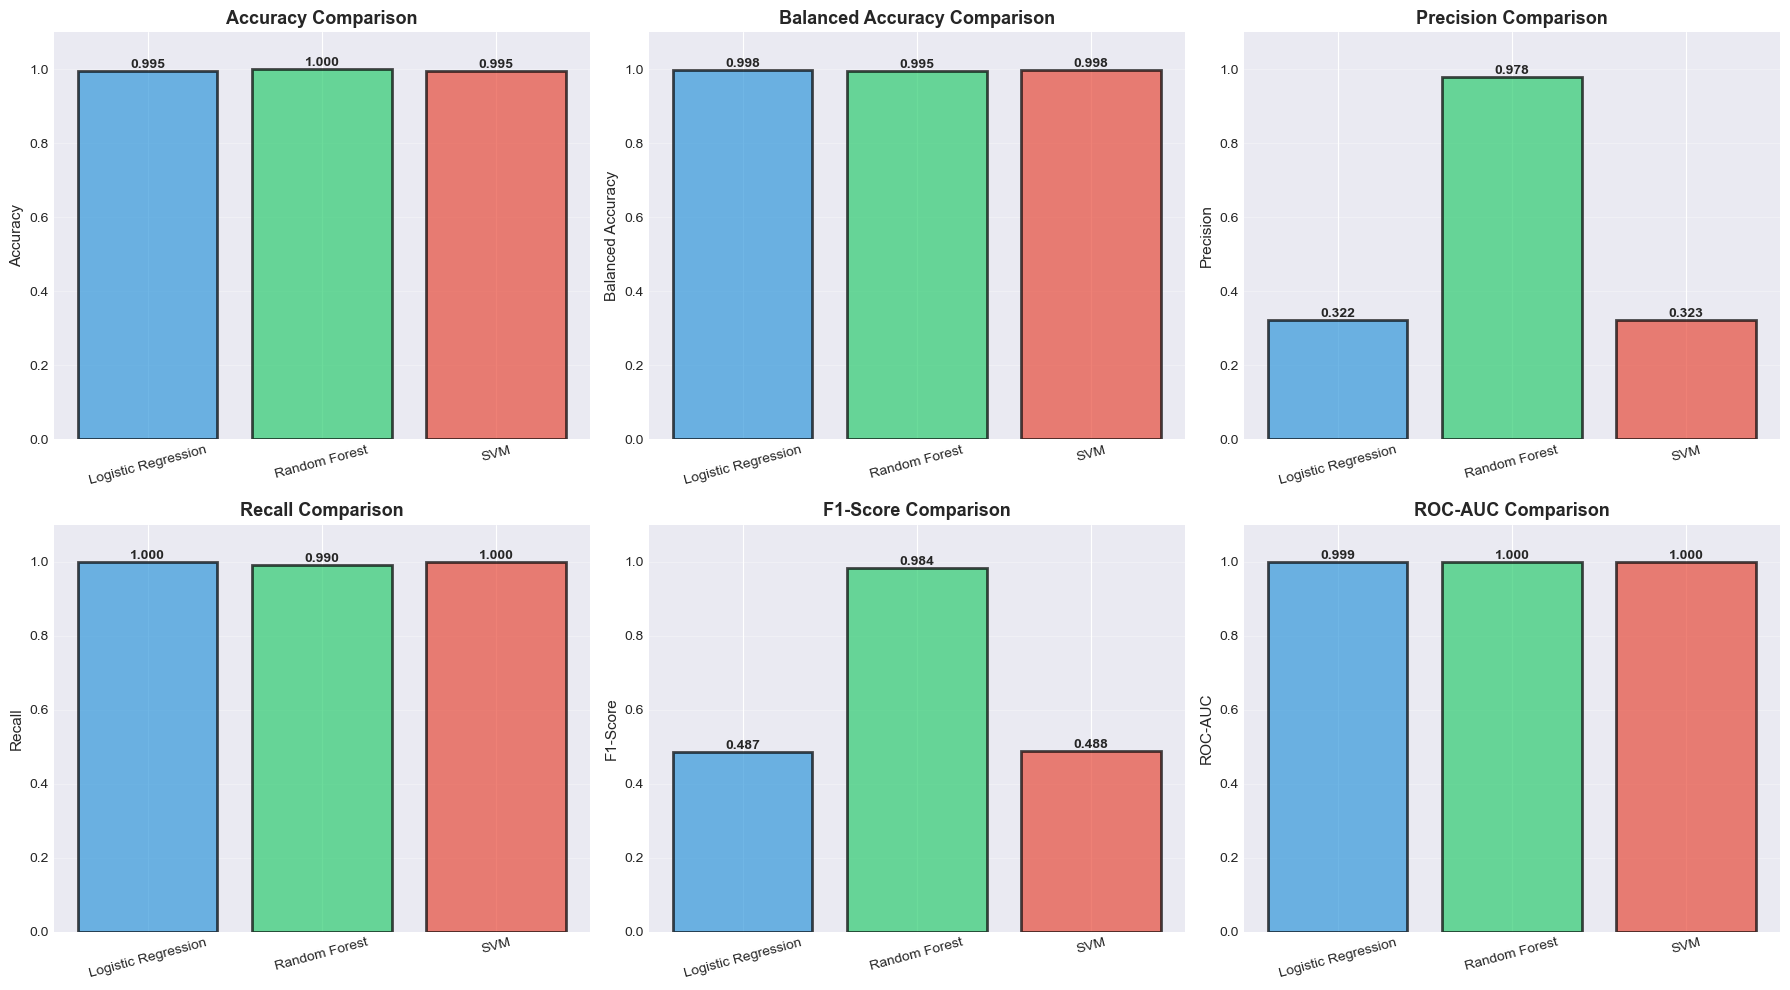

In [34]:
# Visualize multi-metric comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
colors_models = ['#3498db', '#2ecc71', '#e74c3c']

metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    bars = ax.bar(results_df['Model'], results_df[metric], color=colors_models, alpha=0.7, edgecolor='black', linewidth=2)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    ax.set_ylabel(metric, fontsize=11)
    ax.set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    ax.set_ylim(0, 1.1)
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

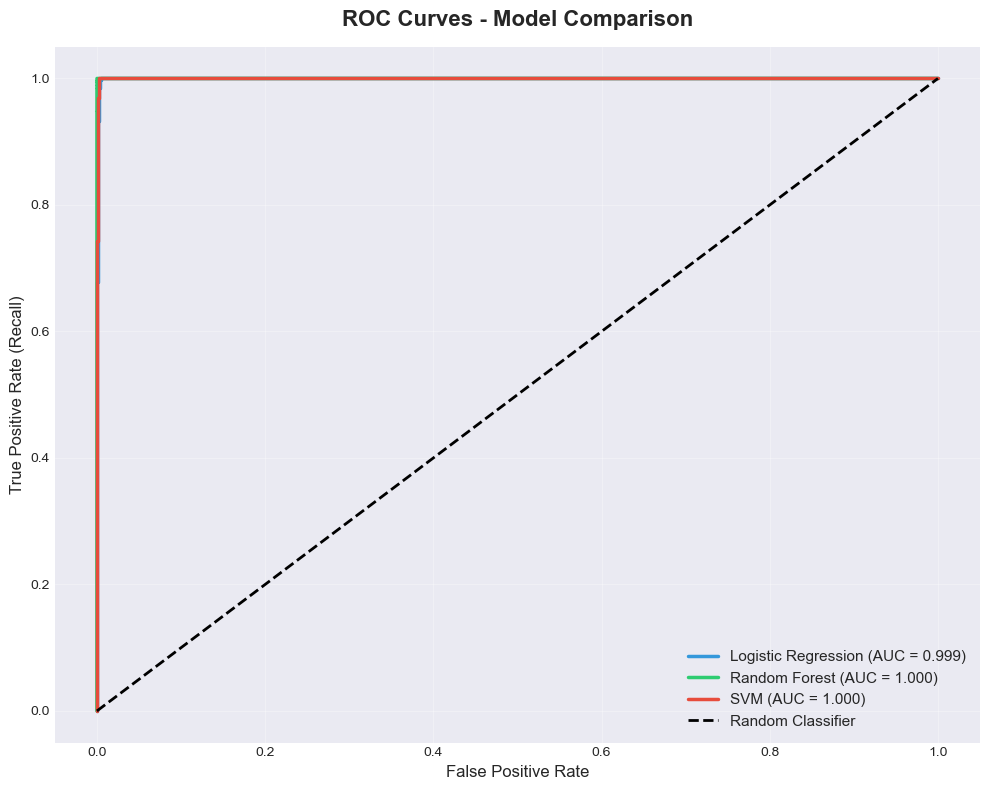

In [35]:
# ROC Curve Comparison
from sklearn.metrics import roc_curve

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', linewidth=2.5, color='#3498db')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2.5, color='#2ecc71')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {svm_auc:.3f})', linewidth=2.5, color='#e74c3c')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=16, fontweight='bold', pad=15)
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

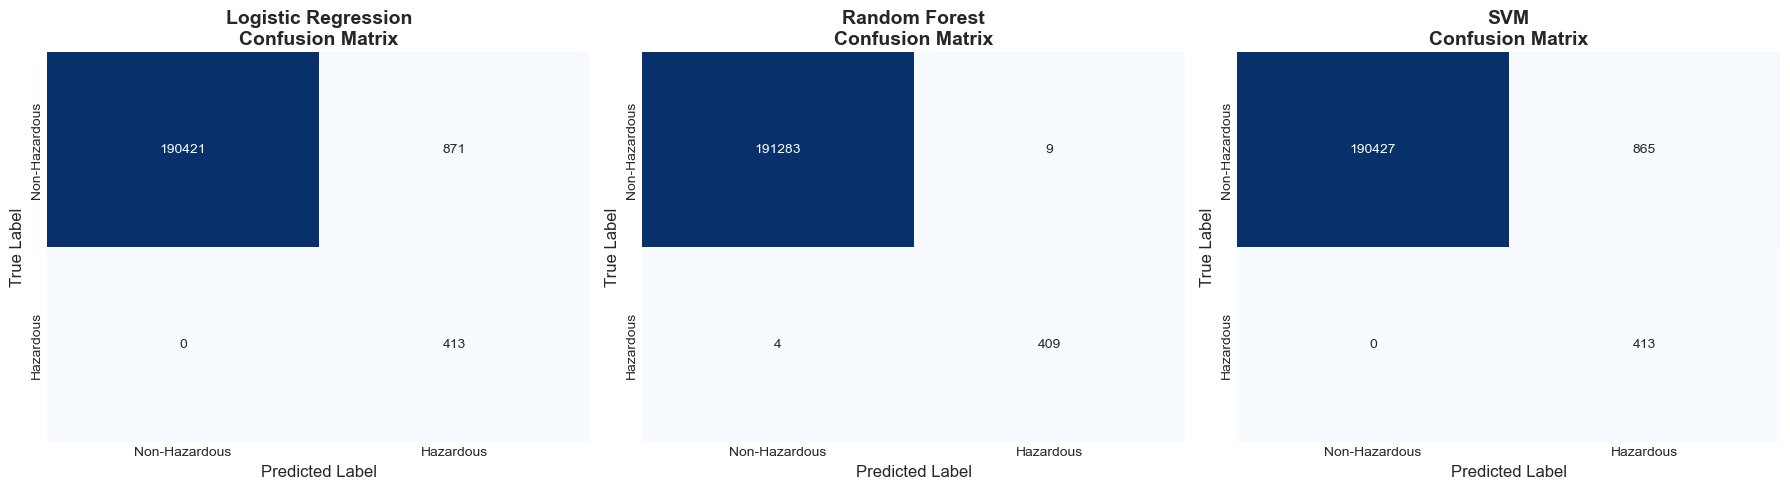

In [36]:
# Confusion Matrix Visualization
# Create subplots for all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_cm = [
    ('Logistic Regression', cm_lr),
    ('Random Forest', cm_rf),
    ('SVM', cm_svm)
]

for idx, (name, cm) in enumerate(models_cm):
    ax = axes[idx]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                xticklabels=['Non-Hazardous', 'Hazardous'],
                yticklabels=['Non-Hazardous', 'Hazardous'])
    ax.set_title(f'{name}\nConfusion Matrix', fontsize=14, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

In [39]:
print("\n📊 Final Model Rankings (by F1-Score - Best for Imbalanced Data):")
ranked = results_df.sort_values('F1-Score', ascending=False)
for i, row in ranked.iterrows():
    print(f"{i+1}. {row['Model']}:")
    print(f"   - Recall: {row['Recall']:.4f} (catches {row['Recall']*100:.1f}% of hazardous asteroids)")
    print(f"   - Precision: {row['Precision']:.4f} (accuracy of hazard predictions)")
    print(f"   - F1-Score: {row['F1-Score']:.4f} (overall balance)\n")

print("\n🎯 Key Insight: In asteroid detection, HIGH RECALL is critical!")
print("   Missing a hazardous asteroid could be catastrophic.")
print("\n✅ All models properly handle the severe class imbalance (99.78% non-hazardous)")


📊 Final Model Rankings (by F1-Score - Best for Imbalanced Data):
2. Random Forest:
   - Recall: 0.9903 (catches 99.0% of hazardous asteroids)
   - Precision: 0.9785 (accuracy of hazard predictions)
   - F1-Score: 0.9844 (overall balance)

3. SVM:
   - Recall: 1.0000 (catches 100.0% of hazardous asteroids)
   - Precision: 0.3232 (accuracy of hazard predictions)
   - F1-Score: 0.4885 (overall balance)

1. Logistic Regression:
   - Recall: 1.0000 (catches 100.0% of hazardous asteroids)
   - Precision: 0.3217 (accuracy of hazard predictions)
   - F1-Score: 0.4867 (overall balance)


🎯 Key Insight: In asteroid detection, HIGH RECALL is critical!
   Missing a hazardous asteroid could be catastrophic.

✅ All models properly handle the severe class imbalance (99.78% non-hazardous)


In [ ]:
print("\n🚀 Next Steps:")
